In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
(train_img, train_lbl), (test_img, test_lbl) = tf.keras.datasets.mnist.load_data()
print(type(train_img))

<class 'numpy.ndarray'>


In [3]:
TRAIN_PATH = os.path.join(os.getcwd(), 'train_data')
TEST_PATH = os.path.join(os.getcwd(), 'test_data')

In [4]:
# DATA TO NUMPY ARRAYS

def data_to_arr(path):
    data = []
    labels = []
    
    for cat in os.listdir(path):
        cat_path = os.path.join(path, cat)
        for file in os.listdir(cat_path):
            entry = []    
            labels.append(cat)

            file_path = os.path.join(cat_path, file)
            
            f = open(file_path)
            line = f.readline().strip()
            
            while line != '':
                x,y,z = line.split('|')
                entry.append([x, y, z])
                
                line = f.readline().strip()
            
            if entry == []:
                print(file_path)
                
            data.append(entry)
            
    data, labels = np.array(data), np.array(labels)
            
    return data, labels
            
        
train_data, train_labels = data_to_arr(TRAIN_PATH)
test_data, test_labels = data_to_arr(TEST_PATH)

In [5]:
train_data.shape

(7801, 20, 3)

In [6]:
# Convert labels to categories + Find number of categories
categories = []
for label in train_labels:
    if label not in categories:
        categories.append(label)
        
NUM_CLASSES = len(categories)

with open('categories.py', 'w') as file:
    file.write('categories =' + str(categories))

In [7]:
train_labels_new = train_labels.copy()
test_labels_new = test_labels.copy()

for i in range(len(train_labels_new)):
    train_labels_new[i] = int(categories.index(train_labels_new[i]))


for i in range(len(test_labels_new)):
    test_labels_new[i] = int(categories.index(test_labels_new[i]))
    
train_labels_new = train_labels_new.astype(int)
test_labels_new = test_labels_new.astype(int)

In [8]:
train_data = train_data.astype(float)
test_data = test_data.astype(float)

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels_new))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels_new))

In [10]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(20, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [13]:
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_13 (Dense)             (None, 150)               19350     
_________________________________________________________________
dense_14 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_15 (Dense)             (None, 28)                2128      
Total params: 40,611
Trainable params: 40,611
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_dataset, epochs=500)

Epoch 1/500
122/122 [==============================] - 0s 1ms/step - loss: 3.3720 - sparse_categorical_accuracy: 0.0267
Epoch 2/500
122/122 [==============================] - 0s 1ms/step - loss: 3.2976 - sparse_categorical_accuracy: 0.0217
Epoch 3/500
122/122 [==============================] - 0s 1ms/step - loss: 3.2056 - sparse_categorical_accuracy: 0.0173
Epoch 4/500
122/122 [==============================] - 0s 1ms/step - loss: 3.1100 - sparse_categorical_accuracy: 0.0072
Epoch 5/500
122/122 [==============================] - 0s 1ms/step - loss: 2.8208 - sparse_categorical_accuracy: 0.0342
Epoch 6/500
122/122 [==============================] - 0s 1ms/step - loss: 2.7563 - sparse_categorical_accuracy: 0.0346
Epoch 7/500
122/122 [==============================] - 0s 1ms/step - loss: 2.7651 - sparse_categorical_accuracy: 0.0259
Epoch 8/500
122/122 [==============================] - 0s 1ms/step - loss: 2.7186 - sparse_categorical_accuracy: 0.0369
Epoch 9/500
122/122 [===================

Text(0.5, 0, 'epoch')

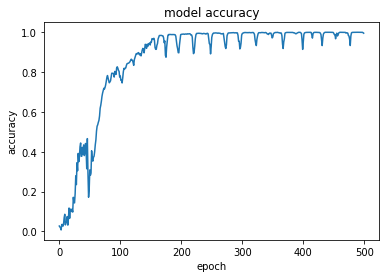

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [16]:
model.evaluate(test_data, test_labels_new, verbose=2)

7/7 - 0s - loss: 0.2660 - sparse_categorical_accuracy: 0.9491


[0.26595020294189453, 0.9490740895271301]

In [22]:
!mkdir saved_model

In [17]:
model.save(os.path.join(os.getcwd(), 'saved_model', 'my_model'))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /Users/glenda/Desktop/Coding/ML stuff/projects/signlanguage/saved_model/my_model/assets


In [107]:
model.save('sign_language_model.h5')